In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import Libraries

# DS 
import os
from itertools import islice
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import seaborn as sns

# PLOTLY
import plotly.offline as po
import plotly.graph_objs as go

# SKLEARN
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import (GradientBoostingRegressor, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              AdaBoostRegressor,
                              RandomForestRegressor,
                              RandomForestClassifier)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, confusion_matrix, accuracy_score, plot_roc_curve
from sklearn.svm import SVC
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

import warnings
warnings.filterwarnings('ignore')
# Aesthetic Plots
%matplotlib inline


# Aesthetic Plots
import mplcyberpunk
plt.style.use('cyberpunk')
%matplotlib inline

In [3]:
# Modules
from src.data_clean import *
from src.grid_search import *
from src.helpers import *

In [4]:
# GLOBAL VARS
FSIZE = (12, 8)

In [5]:
# Pre Feature Changes 
def data_cleaner_pre(df):
    #Convert last_trip_date and signup_date to datetime object
    df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
    df['signup_date'] = pd.to_datetime(df['signup_date'])
    #Convert last_trip_date column to int
    df['last_trip_date'] = df['last_trip_date'] <= '2014-06-01'
    df['last_trip_date'] = df['last_trip_date'].astype(int)
    df['luxury_car_user'] = df['luxury_car_user'].astype(int)
    #Drop Columns
    df.drop(columns=['signup_date', 'phone'], inplace=True)
    #Rename target values
    df.rename(columns={'last_trip_date': 'target'}, inplace=True)
    #Hot encode categorical features
    df = pd.get_dummies(df, columns=['city'])
    # Fill in missing values
    imputer = SimpleImputer()
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    #Remove Duplicate Rows
    df.drop_duplicates()
    return df

In [6]:
# Original Data
original = data_cleaner_pre(pd.read_csv("data/churn_train.csv"))
# Create X, y arrays from dataframe
X_pre = original
y_pre = original.pop("target")

# Train Test Split Data
# X_train_pre, X_test_pre, y_train_pre, y_test_pre = train_test_split(X, y)

In [7]:
# Read and Clean CSV
churn = data_cleaner(pd.read_csv("data/churn_train.csv"))

In [8]:
# Create X, y arrays from dataframe
X = churn
y = churn.pop("target")

# Train Test Split Data
# X_train, X_test, y_train, y_test = train_test_split(X, y)

# Model Comparison

In [9]:
def get_model_scores(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)    
    #Fit the logistic Regression Model
    logmodel = LogisticRegression(random_state = 50)
    logmodel.fit(X_train,y_train)

    #Predict the value for new, unseen data
    pred = logmodel.predict(X_test)

    # Find Accuracy using accuracy_score method
    logmodel_accuracy = round(accuracy_score(y_test, pred) * 100, 2)

    # Scaler
    scaler = MinMaxScaler()

    #Fit the K-Nearest Neighbor Model
    knnmodel = KNeighborsClassifier(n_neighbors=20, metric='minkowski', p=2) #p=2 represents Euclidean distance, p=1 represents Manhattan Distance
    knnmodel.fit(scaler.fit_transform(X_train), y_train) 

    #Predict the value for new, unseen data
    knn_pred = knnmodel.predict(X_test)

    # Find Accuracy using accuracy_score method
    knn_accuracy = round(accuracy_score(y_test, knn_pred) * 100, 2)

    #Fit the Decision Tree Classification Model
    dtmodel = DecisionTreeClassifier(criterion = "gini", random_state = 50)
    dtmodel.fit(X_train, y_train) 

    #Predict the value for new, unseen data
    dt_pred = dtmodel.predict(X_test)

    # Find Accuracy using accuracy_score method
    dt_accuracy = round(accuracy_score(y_test, dt_pred) * 100, 2)

    #Fit the Random Forest Classification Model
    rfmodel = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
    rfmodel.fit(X_train, y_train) 

    #Predict the value for new, unseen data
    rf_pred = rfmodel.predict(X_test)

    # Find Accuracy using accuracy_score method
    rf_accuracy = round(accuracy_score(y_test, rf_pred) * 100, 2)

    #Fit the Gradient Boosted Classification Model
    gbmodel = GradientBoostingClassifier(random_state=50)
    gbmodel.fit(X_train,y_train)

    #Predict the value for new, unseen data
    pred = gbmodel.predict(X_test)

    # Find Accuracy using accuracy_score method
    gbmodel_accuracy = round(accuracy_score(y_test, pred) * 100, 2)

    #Fit the Gradient Boosted Classification Model
    gbmodel_grid = GradientBoostingClassifier(learning_rate=0.1,
                                         max_depth=6,
                                         max_features=0.3,
                                         min_samples_leaf=10,
                                         n_estimators=100,
                                         random_state=50)
    gbmodel_grid.fit(X_train,y_train)

    #Predict the value for new, unseen data
    pred = gbmodel_grid.predict(X_test)

    # Find Accuracy using accuracy_score method
    gbmodel_grid_accuracy = round(accuracy_score(y_test, pred) * 100, 2)
    
    #Fit the Gradient Boosted Classification Model
    gbmodel_grid_cv = GradientBoostingClassifier(learning_rate=0.2,
                                         max_depth=4,
                                         max_features=9,
                                         min_samples_leaf=2,
                                         n_estimators=150,
                                         random_state=50)
    gbmodel_grid_cv.fit(X_train,y_train)

    #Predict the value for new, unseen data
    pred = gbmodel_grid_cv.predict(X_test)

    # Find Accuracy using accuracy_score method
    gbmodel_grid_cv_accuracy = round(accuracy_score(y_test, pred) * 100, 2)
    
    return [logmodel_accuracy, knn_accuracy, dt_accuracy, rf_accuracy, gbmodel_accuracy, gbmodel_grid_accuracy, gbmodel_grid_cv_accuracy]

> Gradient Boosted Classification (POST GRID)

```
'learning_rate': 0.1,
'max_depth': 6,
'max_features': 0.3,
'min_samples_leaf': 10,
'n_estimators': 100,
'random_state': 50
```

> Gradient Boosted Classification (POST GRID CV)

```
 'learning_rate': 0.2,
 'loss': 'exponential',
 'max_depth': 4,
 'max_features': 9,
 'min_samples_leaf': 2,
 'n_estimators': 150
```

In [10]:
scores_pre = get_model_scores(X_pre, y_pre)
# Compare Several models according to their Accuracies
Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbor', 
              'Decision Tree', 'Random Forest', 'Gradient Boosting Classifier', 'Gradient Boosting Classifier (POST GRID)', 'Gradient Boosting Classifier (POST GRID CV)'],
    'Score (Pre)': scores_pre})
Model_Comparison_df = Model_Comparison.sort_values(by='Score (Pre)', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score (Pre)')
Model_Comparison_df.reset_index()

,Score (Pre),Model
0,78.56,Gradient Boosting Classifier (POST GRID CV)
1,78.55,Gradient Boosting Classifier (POST GRID)
2,78.07,Gradient Boosting Classifier
3,75.60,Random Forest
4,71.08,Logistic Regression
5,69.63,Decision Tree
6,63.85,K-Nearest Neighbor


In [11]:
scores_post = get_model_scores(X, y)
# Compare Several models according to their Accuracies
Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbor', 
              'Decision Tree', 'Random Forest', 'Gradient Boosting Classifier', 'Gradient Boosting Classifier (POST GRID)', 'Gradient Boosting Classifier (POST GRID CV)'],
    'Scores Post': scores_post})
Model_Comparison_df = Model_Comparison.sort_values(by='Scores Post', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Scores Post')
Model_Comparison_df.reset_index()

,Scores Post,Model
0,78.29,Gradient Boosting Classifier (POST GRID CV)
1,78.17,Gradient Boosting Classifier (POST GRID)
2,77.88,Gradient Boosting Classifier
3,74.32,Random Forest
4,71.54,Logistic Regression
5,69.43,Decision Tree
6,63.58,K-Nearest Neighbor


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)    

#Fit the Gradient Boosted Classification Model | OUR BEST MODEL
gbmodel_grid_cv = GradientBoostingClassifier(learning_rate=0.2,
                                     max_depth=4,
                                     max_features=9,
                                     min_samples_leaf=2,
                                     n_estimators=150,
                                     random_state=50)
gbmodel_grid_cv.fit(X_train ,y_train)

#Predict the value for new, unseen data
pred = gbmodel_grid_cv.predict(X_test)

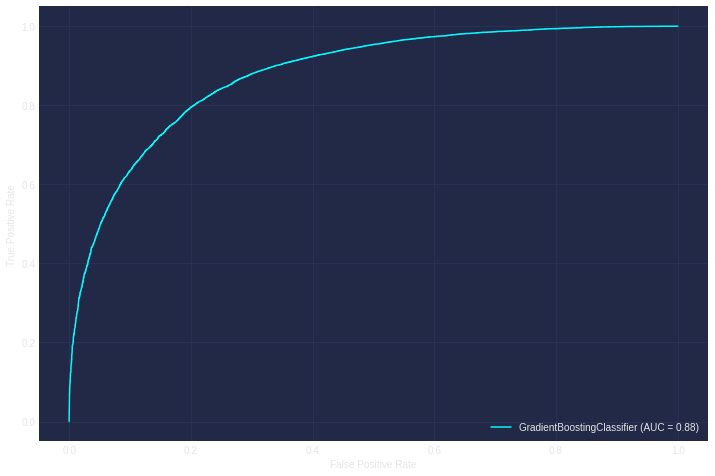

In [13]:
# Plot ROC Curve
fig, ax = plt.subplots(figsize=FSIZE)
plot_roc_curve(gbmodel_grid_cv, X_train, y_train, ax=ax)

In [14]:
# Confusion Matrix GBC POST GRID CV
true_neg, false_pos, false_neg, true_pos = confusion_matrix(y_test, pred).flatten()
true_neg, false_pos, false_neg, true_pos

(2314, 1169, 867, 5030)

| -        |       Predicted Negative      |  Predicted Positive |
| ------------- |:-------------:| -----:|
| Actual Negative | 2314 (TN)  | 1169 (FP)
| Actual Positive | 867 (FN) | 5030 (TP)

PRECISION / RECALL

| -        |       Precision      |  Recall |
| ------------- |:-------------:| -----:|
| Best | 0.816  | 0.852



In [15]:
# Precision GBC
precision_after = true_pos / (true_pos + false_pos)
precision_after

0.8114211969672528

In [16]:
# Recall GBC
recall_after = true_pos / (true_pos + false_neg)
recall_after

0.8529760895370527

## Evaluating the Performance on Validation Data

In [17]:
validation = data_cleaner(pd.read_csv("data/churn_test.csv"))

In [18]:
X_validation = validation
y_validation = validation.pop('target')

In [19]:
pred_validation = gbmodel_grid_cv.predict(X_validation)

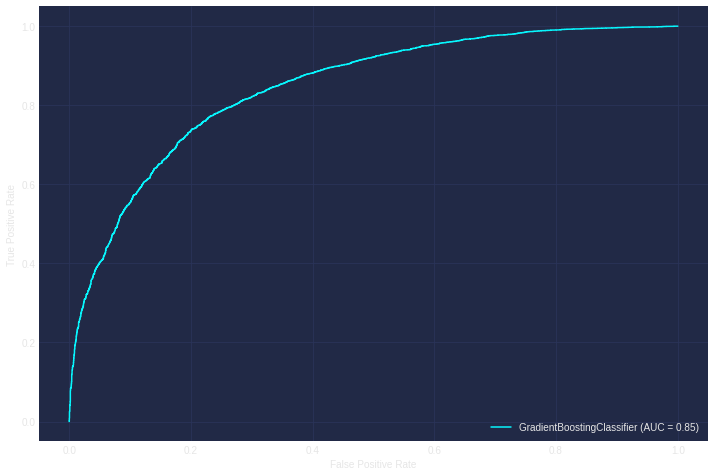

In [20]:
# Plot ROC Curve
fig, ax = plt.subplots(figsize=FSIZE)
plot_roc_curve(gbmodel_grid_cv, X_validation, y_validation, ax=ax)

In [21]:
# Confusion Matrix GBC POST GRID CV
true_neg, false_pos, false_neg, true_pos = confusion_matrix(y_validation, pred_validation).flatten()
true_neg, false_pos, false_neg, true_pos

(2332, 1207, 883, 4967)

In [22]:
# Precision GBC
precision_after = true_pos / (true_pos + false_pos)
precision_after

0.8045027534823453

In [23]:
# Recall GBC
recall_after = true_pos / (true_pos + false_neg)
recall_after

0.849059829059829

| -        |       Predicted Negative      |  Predicted Positive |
| ------------- |:-------------:| -----:|
| Actual Negative | 2332 (TN)  | 1207 (FP)
| Actual Positive | 883 (FN) | 4967 (TP)

PRECISION / RECALL

| -        |       Precision      |  Recall |
| ------------- |:-------------:| -----:|
| Best | 0.805  | 0.849